<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/5_K_MEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K-Means Clustering

#### 작동 원리
1. **초기 중심점 설정**: 데이터에서 임의로 k개의 중심점을 선택합니다.
2. **데이터 할당**: 각 데이터를 가장 가까운 중심점에 할당하여 군집을 형성합니다.
3. **중심점 업데이트**: 각 군집의 중심점을 다시 계산합니다.
4. **수렴 조건 확인**: 중심점이 더 이상 이동하지 않거나 설정한 반복 횟수에 도달할 때까지 2~3 단계를 반복합니다.

#### 장점
1. **간단하고 효율적**: 구현이 간단하고 대용량 데이터셋에서도 빠르게 동작합니다.
2. **해석 용이**: 클러스터 중심(centroid)을 기반으로 결과를 쉽게 해석할 수 있습니다.
3. **적은 메모리 사용**: 군집 수(k)가 작을 때 메모리 사용량이 적습니다.

#### 단점
1. **군집 수(k) 사전 지정 필요**: 최적의 k 값을 미리 알아야 합니다.
2. **초기 중심값 의존**: 초기 중심값 설정에 따라 결과가 달라질 수 있습니다.
3. **비구형 데이터 군집화 어려움**: 구형이 아닌 복잡한 데이터 분포에는 적합하지 않습니다.
4. **이상치 민감**: 이상치(outlier)에 민감합니다.

#### 적용 사례
1. **고객 세분화(Customer Segmentation)**: 고객 구매 패턴에 따라 그룹화하여 마케팅 전략 수립
2. **이미지 압축(Image Compression)**: 색상 클러스터링을 통해 이미지 압축
3. **이상 탐지(Anomaly Detection)**: 비정상 거래 탐지

---

### K-Means 예제 코드

```python
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# 데이터 생성
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 최적의 K 찾기 (Elbow Method)
inertia = []
silhouette_scores = []
for k in range(2, 11):  # Silhouette Score는 최소 2개의 군집부터 적용
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# 엘보우 그래프 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# 실루엣 점수 시각화
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 최적 K=4로 K-Means 학습
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 군집 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
```

---

### 평가 및 해석
- **Inertia(관성)**: 각 데이터 포인트와 중심점 간의 거리 제곱합. 값이 작을수록 군집화가 잘 된 것.
- **Elbow Method**: 군집 수(k)에 따른 Inertia 변화를 관찰하여 급격한 감소가 멈추는 지점을 최적의 k로 선택.</br>
   K에 따른 오차 제곱합을 시각화, 오차 제곱합이 평평해지기 시작하는 지점으로 K를 정한다.
- **Silhouette Score**: 각 데이터가 군집 내에서 얼마나 잘 맞는지와 다른 군집과의 차이를 평가. 1에 가까울수록 군집화가 잘 된 것.
- **해석**: Elbow 그래프에서 급격한 감소가 완만해지는 지점과 Silhouette 점수가 최대인 k 값을 참고하여 최적의 군집 수를 결정합니다.

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [308]:
file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer.csv'
customer = pd.read_csv(file_url)

In [309]:
# 1.전처리 - Category dummy와
df = customer.copy()

dummies_df = pd.get_dummies(df, columns = ['category'], dtype ='int')
# dummie된 Category의 컬럼만 list
category_list = dummies_df.columns[2:]


for cate in category_list :
  dummies_df[cate] = dummies_df[cate] * dummies_df['amt']

customer_agg = dummies_df.groupby('cc_num').sum()
customer_agg.head(3)

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45


In [310]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()

s_df = pd.DataFrame(scaler.fit_transform(customer_agg),
                    columns = customer_agg.columns,
                    index = customer_agg.index)

<Axes: >

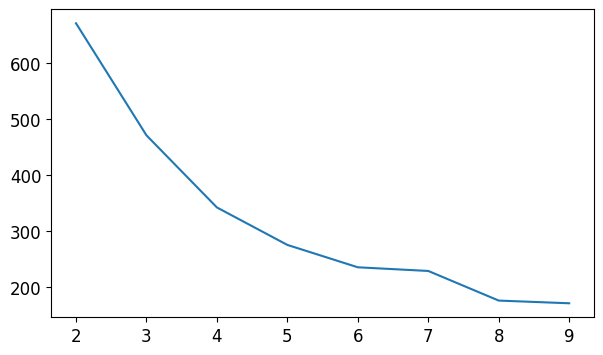

In [311]:
# 실루엣 계수
lst = []
for i in range(2,10) :
  kmodel = KMeans(n_clusters= i)
  kmodel.fit(s_df)
  label = kmodel.predict(s_df)
  lst.append(kmodel.inertia_)

plt.figure(figsize=(7, 4))
sns.lineplot(x = range(2,10), y = lst)

# 완만한 형태로 k값을 결정하기 어려움 >> 실루엣 계수를 활용

### 실루엣 계수
개별 데이터가 가지는 군집화 지표로, 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집과는 얼마나 멀리 분포되어있는지 나타내는 지표로, -1 ~ 1 사이의 값을 가지며, </br>
   1 = 근처 군집과 더 멀리 떨어져 있음 </br>
   0 = 근처의 군집과 가까움 </br>
  -1 = 아예다른 군집에 데이터 포인트가 할당됨 </br>

- 엘보우 기법보다 계산이 오래 걸림
- 엘보우 : 이너셔는 cluster의 중심과 속은 데이터 간의 거리로만 계산
- 실루엣 : cluster 내부의 평균거리와, 최근접한 다른 클러스 데이터와 평균거리도 점수에 반영
- 해석, 높은 값일수록 더 좋은 분류


<Axes: >

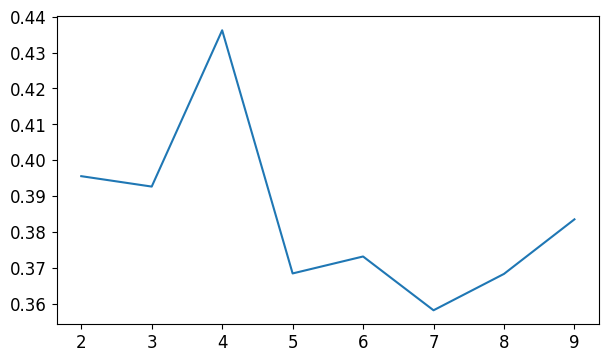

In [312]:
from sklearn.metrics import silhouette_score

sil = []

# random_state 를 지정하기 않으면, KMeans는 실행할때마다 다른 초기 중심점을 선택
for k in range(2,10) :
  k2 = KMeans(n_clusters= k, random_state = 42)
  k2.fit(s_df)
  label = k2.predict(s_df)
  sil.append(silhouette_score(s_df , label))

plt.figure(figsize=(7, 4))
sns.lineplot(x = range(2,10),y = sil)

In [313]:
# 결과 예측
kmean_4 = KMeans(n_clusters= 4)
kmean_4.fit(s_df)
labels = kmean_4.predict(s_df)

s_df['labels'] = labels

df_mean = s_df.groupby('labels').mean()
df_count = s_df.groupby('labels').count()['category_travel']

df_all = pd.concat([df_mean, df_count], axis = 1)

### 완벽머신러닝 예제 (RFM)

In [314]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


In [315]:
# Qauntity가 0이 아닌것과 Unit Price가 0이 아닌것들

df2 = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df2 = df2[df2['CustomerID'].notnull()]



In [316]:
# sales_amount 계산
df2['amount'] = df2['Quantity'] * df2['UnitPrice']

# customerid int변환
df2['CustomerID'] =df2['CustomerID'].astype(int)

# InvoiceDate
import datetime as dt

df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

          Recency     Freqency       Monetary
count  345.000000   345.000000     345.000000
mean    88.756522   115.513043    4145.790174
std    104.813754   343.419645   19255.241859
min     -1.000000     2.000000      63.000000
25%     16.000000    23.000000     460.890000
50%     41.000000    50.000000    1035.800000
75%    115.000000   108.000000    2794.510000
max    372.000000  5675.000000  280206.020000


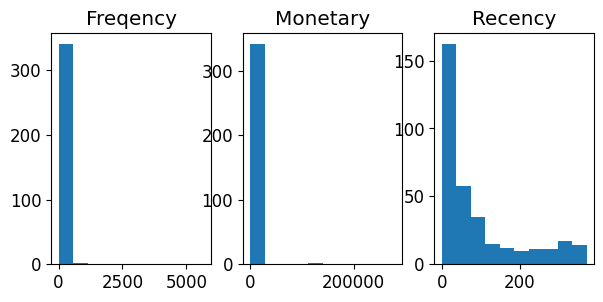

In [317]:
# RFM 계산하기

aggregations = {
    'InvoiceDate' : 'max',
    'InvoiceNo':'count',
    'amount' : 'sum'
}

cust_df = df2.groupby('CustomerID').agg(aggregations)
cust_df.reset_index()


#Receny : df2['InvoiceDate'].max() (2011, 12, 9)
# 개별당 최근 최근의 주문, 가장 최근 날짜에서 - InvoiceDate 빼기

cust_df['Recency'] = dt.datetime(2011,12,9) - cust_df['InvoiceDate']
cust_df['Recency'] = cust_df['Recency'].astype(str).str.split(' ').str[0].astype(int)
cust_df = cust_df.drop(columns = ['InvoiceDate'])
cust_df.columns = ['Freqency', 'Monetary', 'Recency']

fig, axes = plt.subplots(1,3, figsize = (7,3))

for i , ax in enumerate(axes.flat[:]) :
  col_i = cust_df.columns[i]
  ax.hist(cust_df[col_i])
  ax.set_title(col_i)

print(cust_df[['Recency','Freqency','Monetary']].describe())

Recency의 평균은 88인데 50% (중위수)보다 50이상 높다. max값은 372로 75% 115보다 높다. >> 즉, 왜곡 정도가 높다.

Freqency의 평균은 115인데, 평균이 75%인 108에 가깝다. Monetary또한 비슷하다.왜곡의 정도가 높은 데이터 세트에 K-mean를 적용하면 **중심의 개수를 증가** 시키더라도 변벽력이 떨어지는 군집화가 수행되기 때문에 ***평균과 표준편차**를 조정한다.

In [318]:
from sklearn.preprocessing import StandardScaler

X_features = cust_df[['Recency','Freqency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)
X_features_scaled

# K-mean 지정
kmeans = KMeans(n_clusters = 3)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['Labels'] = labels


print(silhouette_score(X_features_scaled, labels))
# 1에 가까운 정수로 안정적인 수치

0.6783717485496676


In [319]:
X_features = cust_df[['Recency','Freqency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)
X_features_scaled

array([[-0.14099251, -0.24645006, -0.12214655],
       [-0.68560413, -0.12397308, -0.1242108 ],
       [ 2.1043361 , -0.28727572, -0.19822789],
       ...,
       [-0.32252972, -0.23770171, -0.1312669 ],
       [-0.16965628, -0.30185632, -0.19618652],
       [-0.83847757,  0.27845129, -0.16598106]])

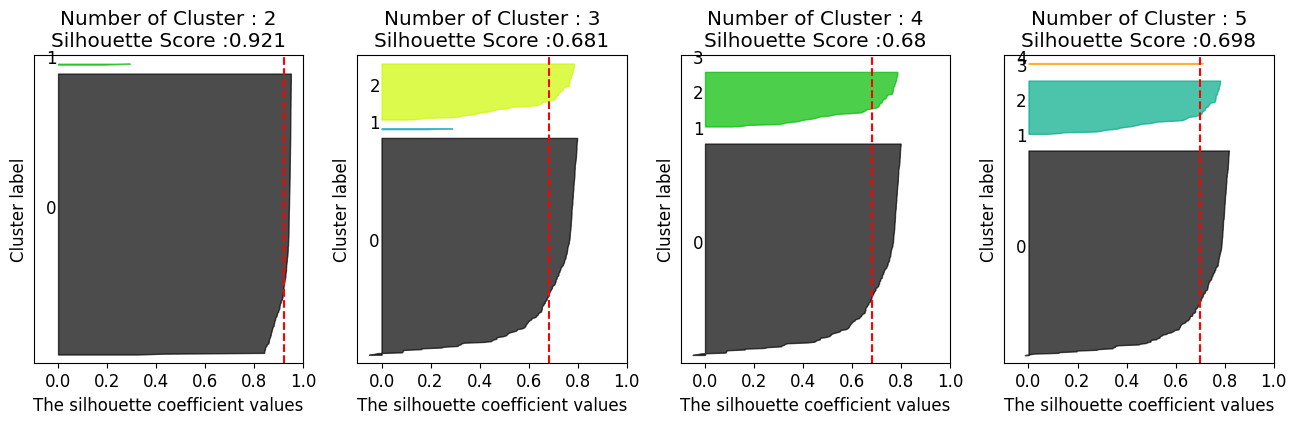

In [320]:
## 여러개의 Cluster개수를 List로 입력 받아 실루엣 계수를 면적으로 시각화

def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5], X_features_scaled)

데이터의 왜곡의 정도를 낮추기 위해 자주 사용되는 log를 적용

In [321]:
# 1) 로그 변환
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Freqency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# 2) StandardScaler()
log_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log' ]]

log_features = log_features.replace([np.inf , -np.inf], np.nan)
log_features = log_features.fillna(0)


log_featuers_scales = StandardScaler().fit_transform(log_features)

# 3) Kmean
kmean = KMeans(n_clusters = 3 , random_state = 0)
labels = kmean.fit_predict(log_featuers_scales)

## PCA & K_Means
2차원 평면상에 개별 데이터의 군집을 시각화할때, 속성이 N개이면 2차원평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X,Y 좌표를 개별 데이터를 표현한다.

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


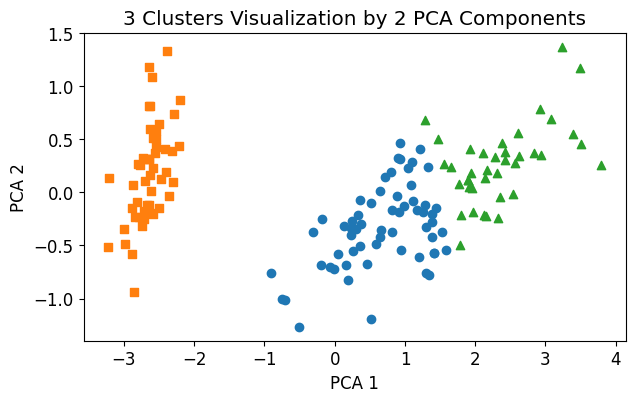

In [322]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

plt.figure(figsize=(7, 4))

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### DBSCAN

- 데이터의 밀집 지역이 Cluster구성 (핵심 샘플)하고,
  비어있는 지역을 경계로 다른 클라서터와 구분
- DBSCAN이 구분하는 데이터의 종류는 핵심, 경계, 잡음     
  데이터 핵심과 잡음 데이터는 동일하게 분류되는데, 경계 데이터는 한 개 이상의 클러스터로 분류
- 데이터 포인트를 방문하는 순서에 따라 경계 데이터가 어떤
  클러스터에 속할지 달라짐

[군집 K정하는 방법] </br>
eps, min_sampes
    - eps : 지정한 거리 안의 데이터들이 min_samples 개수 이상이 되면 데이터들을 핵심 샘플로 분류하여, 하나의 클러스터를 형성, eps의 값을 조정함으로써 클러스터 개수를 제어하고, min_samples로 클러스터의 최소 크기를 제어

[장단점] </br>
장점 : 노이즈 데이터를 구분 가능
단점 : 밀도가 높은 곳에 집중하기 때문에 밀도가 낲은 곳의 데이터를 하나의 군집으로 인식하지 못하고 노이즈 데이터로 구분/ K-means보다 느리고, 데이터가 많아지면 연산이 증가

적정한 eps 정하기:


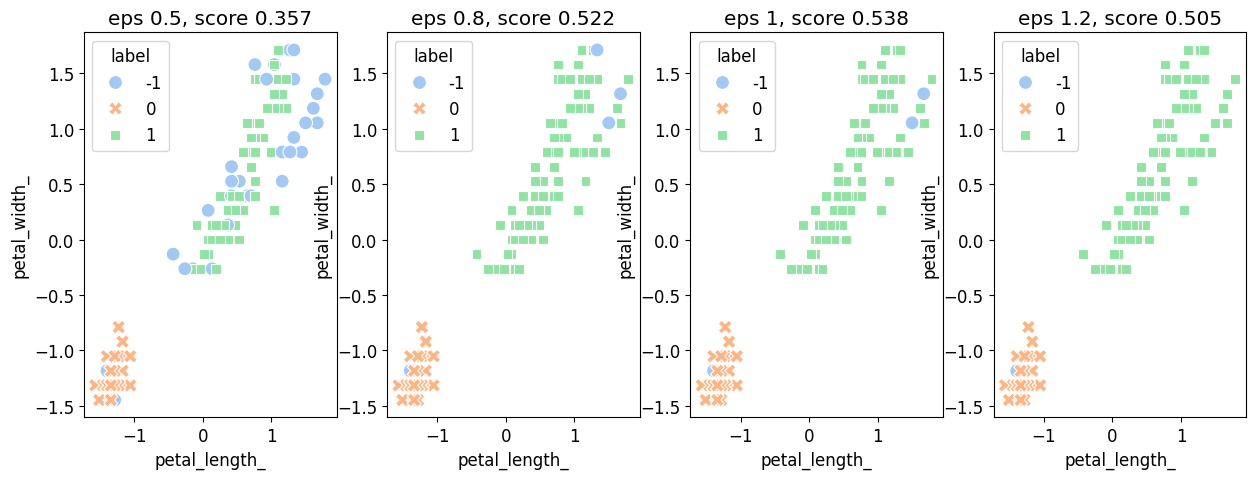

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
핵심 데이터 인덱스:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  58  59  61  62  63  64  65  66  67  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  86  88  89  90  91  92  94  95  96  97  98
  99 100 101 102 103 104 107 110 111 112 113 114 115 116 120 121 123 124
 125 126 127 128 129 130 132 133 134 136 137 138 139 140 141 142 143 144
 145 146 147 148 1

In [323]:
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 적정한 eps 정하기 (min_samples는 10으로 고정함)
# eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함된다. 이는 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만든다. min_samples는 클러스터의 최소 크기를 결정한다.
print("적정한 eps 정하기:")
eps_list =[0.5, 0.8, 1, 1.2] # eps 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
plt.rcParams['font.size'] = 12
for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples = 5).fit(df)
    temp_df = df.copy()
    temp_df['label']=db.labels_
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=100, ax=ax, palette='pastel')
    score = silhouette_score(df, db.labels_)
    ax.set_title("eps {}, score {:.3f}".format(eps, score))
plt.show()

eps = 1
model = DBSCAN(eps=eps, min_samples = 10).fit(df)
DB_result = model.labels_ # 각 데이터의 군집 반환
print(DB_result)

# 군집 정보 확인
#print("클러스터 구성: ", Counter(model.labels_)) # 노이즈 샘플은 -1로 표시됨
print("핵심 데이터 인덱스: ", model.core_sample_indices_)

# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, DB_result))
print("completeness_score: %.3f" %completeness_score(y, DB_result))

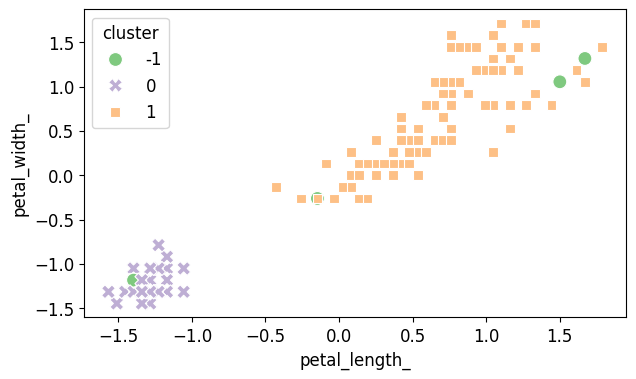

In [324]:
# 군집 결과 시각화

df['cluster'] = DB_result
fig, ax = plt.subplots(1,1, figsize = (7,4))
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

# 혼합 분포 군집 (Mixture Model Clustering)

혼합 분포 군집은 데이터가 여러 분포(예: 가우시안 분포)의 조합으로 구성된다는 가정하에 데이터를 군집화하는 통계적 기법입니다. 각 데이터 포인트가 특정 분포에서 생성되었을 확률에 따라 군집을 할당하며, **Expectation-Maximization (EM) 알고리즘**을 사용하여 최적의 분포를 추정 </br>

서로 비슷하지만 모든 데이터가 반드시 서로 가까울 필요는 없는 그룹과 서로 비슷하면서 데이터들이 아주 가까이게 있는 또 다른 그룹이 있을때 사용

---

## 핵심 원리

1. **혼합 모델(Mixture Model)**:
   - 데이터를 여러 확률 분포(예: 가우시안)로 표현하고, 각 분포는 하나의 군집에 해당.
   - 혼합 모델은 각 군집의 가중치(확률), 평균, 분산 등을 학습하여 데이터 분포를 설명.

2. **잠재 변수(Latent Variable)**:
   - 각 데이터 포인트가 어느 분포에서 생성되었는지를 나타내는 숨겨진 변수로 표현.
   - EM 알고리즘을 통해 잠재 변수를 추정.

3. **가우시안 혼합 모델(Gaussian Mixture Model, GMM)**:
   - 가장 널리 사용되는 혼합 모델.
   - 데이터가 가우시안 분포들의 가중합으로 이루어졌다고 가정.

4. **장/단점**
   - 유연성: 다양한 데이터 분포에 적합
   - 군집 모양의 유연한 모델링 가능

   - 초기화 민감도 : 초기 조건에 따라 달라짐
   - 최적의 K 찾기 어려움, 이상치에 민감
   - 고차원 데이터에 취약 : 차원의 저주로 성능 저하


## 최대화 알고리즘 (Expectation - Maxmiziation , EM)
1. E-Step : 각 데이터가 특정 군집에 속할 확률 계산
2. M-Step : E-step기반으로 군집별 파라미터 (평균, 분산, 가중치) 재추정

## 군집 K 정하기

1. 베이지안 정보 기준 (BIC) 및 아카이케 정보 기준 (AIC)
    - BIC 값이 가장 적은 값

```python
## 군집 K 정하기
for k in range(1, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(data)
    print(f"k={k}, BIC={gmm.bic(data)}, AIC={gmm.aic(data)}")

## 기초 파이썬 코드

```python
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 예제 데이터 생성
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=0, scale=1, size=500),
    np.random.normal(loc=5, scale=1, size=500)
]).reshape(-1, 1)

# 가우시안 혼합 모델 적용
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)

# 각 데이터 포인트에 대한 군집 예측
labels = gmm.predict(data)

# 시각화
plt.hist(data, bins=30, alpha=0.5, label='Data')
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', s=10)
plt.title("Gaussian Mixture Model Clustering")
plt.legend()
plt.show()


적정한 분포 개수 정하기:


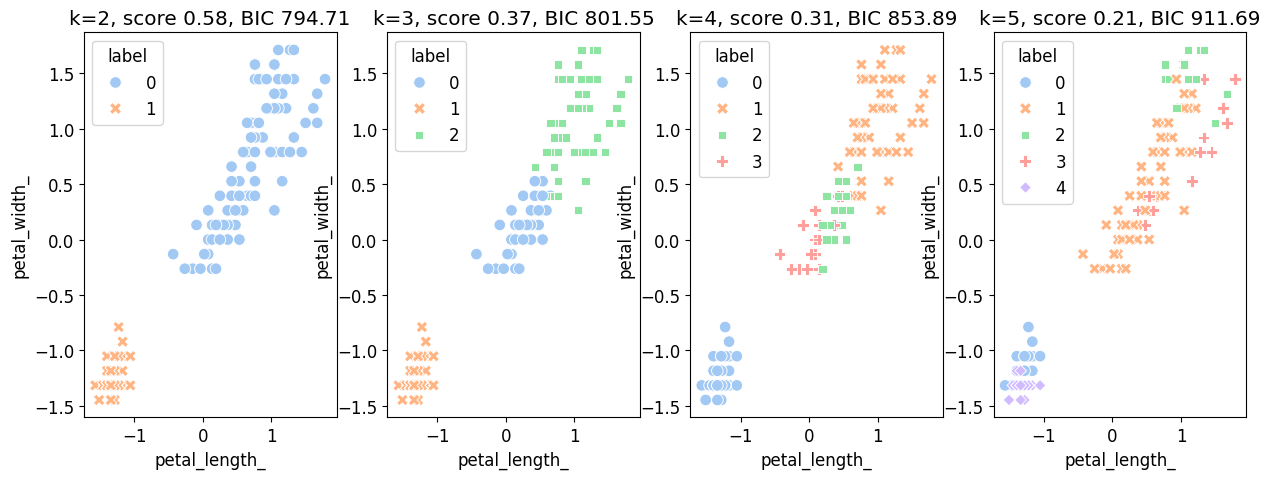

In [325]:
# 혼합분포 군집
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 적정한 분포 개수 정하기 (=군집 개수 정하기)
print("적정한 분포 개수 정하기:")
dist_list =[2,3,4,5] # 분포 개수 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(df)
    # covariance_type: {'full', 'tied', 'diag', 'spherical'}
    temp_df = df.copy()
    temp_df['label']= gm.predict(df)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    aic, bic = gm.aic(df), gm.bic(df)
    score = silhouette_score(df, temp_df['label'])
    ax.set_title("k={}, score {:.2f}, BIC {:.2f}".format(k, score, bic))
plt.show()

### completeness_score
 군집화 평가 지표 중 하나로, 동일한 레이블을 가진 데이터들이 같은 군집에 얼마나 잘 할당되었는지를 측정 </br>
완벽한 completeness_score는 1.0입니다.
0.0에 가까울수록 동일한 레이블을 가진 데이터들이 여러 군집으로 분산되어 있음을 의미</br>
즉, 실제로 같은 클래스인 데이터들이 같은 클러스터에 얼마나 잘 모였는지 나타냄 </br>
completeness_score는 실제 레이블과 예측된 레이블 간의 엔트로피를 기반으로 계산 </br>
예를 들어, 고객을 구매 패턴에 따라 군집화하는 경우, completeness_score는 실제로 같은 구매 패턴을 가진 고객들이 같은 군집에 얼마나 할당 정도 </br>



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
실루엣 계수: 0.374
completeness_score: 0.901


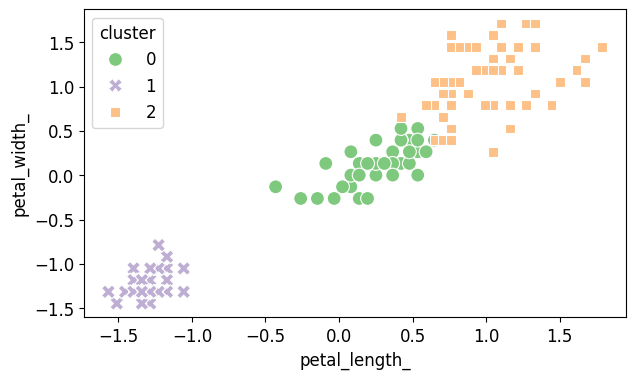

In [326]:
# 확정한 k를 기반으로 각 데이터의 군집을 반환
k = 3
model = GaussianMixture(n_components=k).fit(df)
labels = model.predict(df)
GM_result = labels # 각 데이터의 군집 반환
print(GM_result)

# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, labels))
print("completeness_score: %.3f" %completeness_score(y, labels))

# 군집 결과 시각화
df['cluster'] = GM_result
fig, ax = plt.subplots(1,1, figsize = (7,4))
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

# SOM (Self-Organizing Map)

SOM (Self-Organizing Map)은 비지도 학습 알고리즘으로 고차원 데이터를 저차원(일반적으로 2D) 격자로 투영하여 데이터의 군집 구조를 시각적으로 표현합니다. 주로 데이터의 패턴을 파악하거나 클러스터를 식별하는 데 사용.

---

## \( k \) (군집 수) 정하는 방법

SOM은 군집 수를 명시적으로 지정하지 않습니다. 대신, 격자 크기(예: \( m \times n \))를 설정하여 출력 공간의 크기를 결정합니다. 이후, 격자에 할당된 데이터 패턴을 분석하여 클러스터 개수를 간접적으로 파악

### 방법
1. **격자 크기 설정**:
   - SOM 격자 크기 (\( m \times n \))는 군집의 개수를 암시적으로 제어.
   - \( k \)에 대한 초기 추정치를 기준으로 격자의 크기를 설정

2. **U-매트릭스(U-Matrix)**:
   - SOM의 U-매트릭스는 격자 간 유사성.
   - 데이터 간의 거리가 클수록 U-매트릭스의 값이 높아지므로, 격자 내에서 클러스터 수를 파악.

3. **엘보우 방법**:
   - 격자 위에서 할당된 데이터 포인트를 기준으로 \( k \)를 설정.
   - 엘보우 방법으로 출력 격자의 최적 군집 수를 결정.

4. **실루엣 점수(Silhouette Score)**:
   - SOM의 각 노드가 할당된 데이터 클러스터의 품질을 측정.
   - 다양한 \( k \) 값을 테스트하여 최적의 값.

---

## 장단점

### 장점
- **시각화 가능**: 고차원 데이터를 2D로 투영하여 군집의 분포를 쉽게 이해 가능.
- **유연성**: SOM은 군집 수를 명시적으로 정의하지 않아 다양한 데이터에 적용 가능.
- **데이터 구조 학습**: 데이터의 비선형 구조를 효과적으로 학습.

### 단점
- **격자 크기 의존**: 클러스터 개수는 격자 크기에 영향을 받으며, 초기 설정이 중요.
- **최적화 어려움**: 최적의 격자 크기와 학습률 설정이 어렵고 데이터에 따라 다름.
- **자동 군집화 부족**: 군집 수를 자동으로 결정하지 않으며, 추가 분석이 필요.

---

## Python Code Example

```python
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42)
data = np.random.rand(100, 3)  # 3차원 데이터, 100개 샘플

# SOM 초기화
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)  # 10x10 격자
som.random_weights_init(data)

# 학습
som.train_random(data, 1000)  # 1000번 반복 학습

# U-Matrix 계산
u_matrix = som.distance_map()

# U-Matrix 시각화
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix, cmap='coolwarm')
plt.colorbar(label='Distance')
plt.title('SOM U-Matrix')
plt.show()

# 각 데이터 포인트의 군집 확인
winner_nodes = np.array([som.winner(x) for x in data])
print("Winner nodes (cluster coordinates):")
print(winner_nodes)


In [327]:
#!pip install sklearn-som

적정한 네트워크의 크기 정하기:


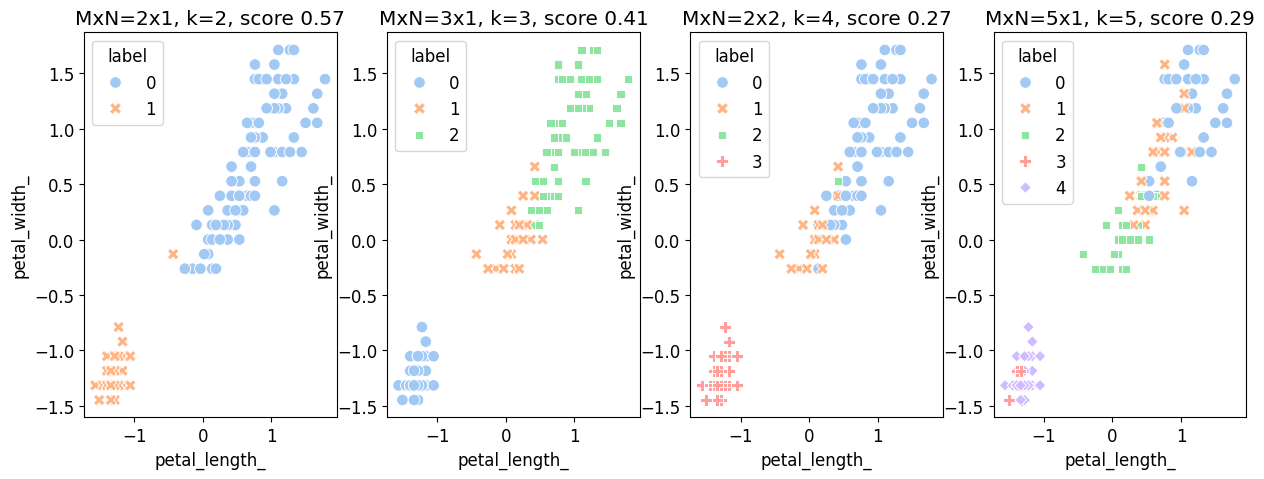

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1
 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
실루엣 계수: 0.436
completeness_score: 0.731


In [328]:
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn_som.som import SOM
from collections import Counter

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)



# 적정한 네트워크의 크기 정하기 (=군집 개수 정하기)
print("적정한 네트워크의 크기 정하기:")
mn_list =[(2,1), (3,1), (2,2), (5,1)] # 분포 개수 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
for ax, (M, N) in zip(axes, mn_list):
    som = SOM(m=M, n=N, dim=df.shape[1]) #dim은 입력 데이터의 feature의 개수
    som.fit(df.values) #배열을 입력해야 함 (df형태는 안됨)
    labels = som.predict(df.values)
    clusterNo = len(Counter(labels))
    temp_df = df.copy()
    temp_df['label']= som.predict(df.values)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    score = silhouette_score(df, temp_df['label'])
    ax.set_title("MxN={}x{}, k={}, score {:.2f}".format(M,N,clusterNo,score))
plt.show()


# 확정한 k를 기반으로 각 데이터의 군집을 반환
M, N = (3, 1)
model = SOM(m=M, n=N, dim=df.shape[1])
model.fit(df.values)
labels = model.predict(df.values)
som_result = labels # 각 데이터의 군집 반환
print(som_result)


# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, labels))
print("completeness_score: %.3f" %completeness_score(y, labels))

### 연습 문제
- 1번 : 2개의 군집 분석 알고리즘으로 각각의 군집을 생성하고 군집 생성 과정을 설명

In [329]:
from pandas import read_csv
df = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice10_credit_card.csv')
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
0  C10001    40.900749           0.818182      95.40             0.166667   
1  C10002  3202.467416           0.909091       0.00             0.000000   
2  C10003  2495.148862           1.000000     773.17             1.000000   
3  C10004  1666.670542           0.636364    1499.00             0.083333   
4  C10005   817.714335           1.000000      16.00             0.083333   

   PURCHASES_TRX  
0              2  
1              0  
2             12  
3              1  
4              1  


Counter({1: 3581, 3: 3477, 2: 1481, 0: 411})
0.4215460427311181


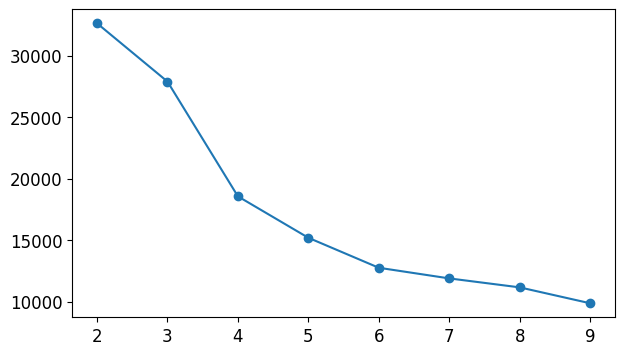

In [330]:
# Cust_id는 ID로 데이터에서 제외한다.
# 표준화 작업을 통해, 단위 차이로 인한 왜곡을 줄여준다.

# K-mean과 혼합 분포 군집으로 군집을 생성한다.

df1 = df.drop(columns =['CUST_ID'])


# Scaler
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(df1) , columns = df1.columns)


# K_means
lst = []

for k in range(2,10) :
  kmean = KMeans(n_clusters= k, random_state = 334).fit(scaled_df)
  lst.append(kmean.inertia_)  # 오차 제곱합

fig, ax = plt.subplots(1,1, figsize = (7,4))
plt.plot(list(range(2,10)) , lst, marker = "o")

# Elbow 차트를 통해, 오차제곱합이 평평해 지기 시작하는 지점의 군집 개수로 K를 설정한다.

kmean_4 = KMeans(n_clusters= 4, random_state = 0)
kmean_4.fit(scaled_df)

label_4 = kmean_4.fit_predict(scaled_df)
print(Counter(kmean_4.labels_))

print(silhouette_score(scaled_df, label_4))

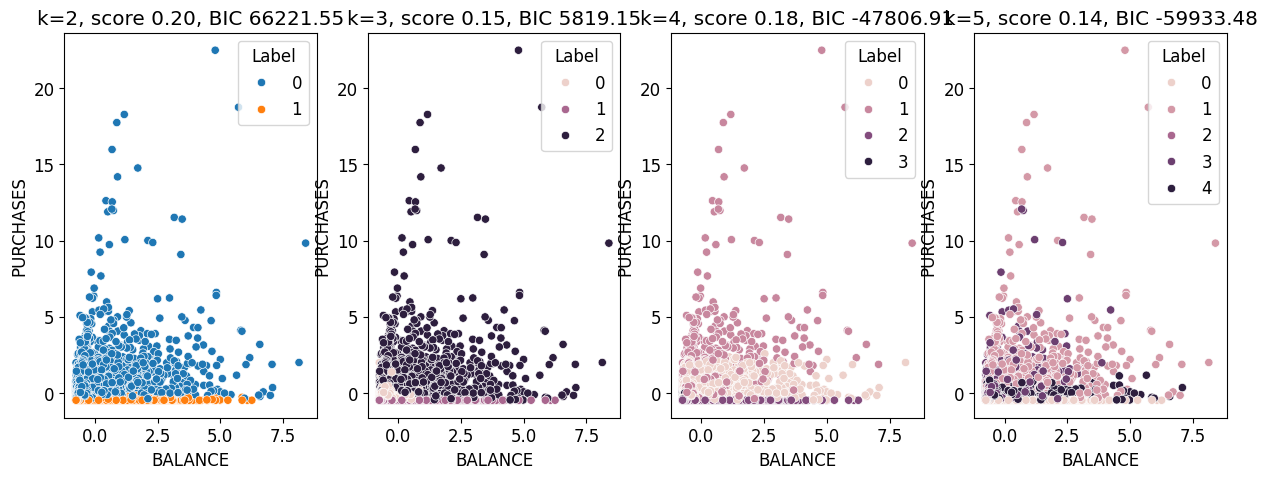

In [331]:
# Step 2) 혼합 군집

# 분포 개수 후보군으로 각각의 실루엣 계수와 BIC를 비교하여 타당한 분포의 개수를 설정한다.
dist_list = [2,3,4,5]

fig, axes = plt.subplots(1,4, figsize = (15,5))

for ax, k in zip(axes, dist_list) :
  gm = GaussianMixture(n_components = k, covariance_type= 'full').fit(scaled_df)
  temp_df = scaled_df.copy()
  temp_df['Label'] = gm.predict(scaled_df)
  sns.scatterplot(x = 'BALANCE', y = 'PURCHASES', hue = 'Label', data = temp_df, ax = ax)
  aic, bic = gm.aic(scaled_df) , gm.bic(scaled_df)
  score = silhouette_score(scaled_df , temp_df['Label'])
  ax.set_title("k={}, score {:.2f}, BIC {:.2f}".format(k, score, bic))

In [332]:
# n_components=4로 군집화
Gmodel = GaussianMixture(n_components=4)
Gmodel.fit(scaled_df)
GM_result = Gmodel.predict(scaled_df)
print(Counter(GM_result))

# 타당성 평가
from sklearn.metrics import silhouette_score
print("실루엣 계수: %.3f" %silhouette_score(scaled_df, GM_result))

# 해석 : 실루엣 계수가 0.17인것으로 미루어보아, 군집 내의 응집도와 군집 간 분리가 더 높은 K-Mena의 결과가 더 낫다.

Counter({2: 4496, 3: 2040, 1: 1426, 0: 988})
실루엣 계수: 0.175


In [333]:

df1['cluster'] = label_4

for i in list(df1['cluster'].unique()) :
  print(f'Cluster :{i}')
  print(df1[df1['cluster'] == i].describe().iloc[:,:-1])

Cluster :3
            BALANCE  BALANCE_FREQUENCY    PURCHASES  PURCHASES_FREQUENCY  \
count   3477.000000        3477.000000  3477.000000          3477.000000   
mean    2400.503193           0.975126   230.516713             0.132515   
std     2283.381271           0.064176   466.190769             0.179344   
min        0.488050           0.545455     0.000000             0.000000   
25%      926.341558           1.000000     0.000000             0.000000   
50%     1603.991792           1.000000     0.050000             0.083333   
75%     3106.418215           1.000000   255.340000             0.250000   
max    16304.889250           1.000000  4900.000000             1.000000   

       PURCHASES_TRX  
count    3477.000000  
mean        2.384527  
std         3.864911  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         4.000000  
max        34.000000  
Cluster :1
           BALANCE  BALANCE_FREQUENCY    PURCHASES  PURCHASES_FREQUENCY  \
count  3581

In [334]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)


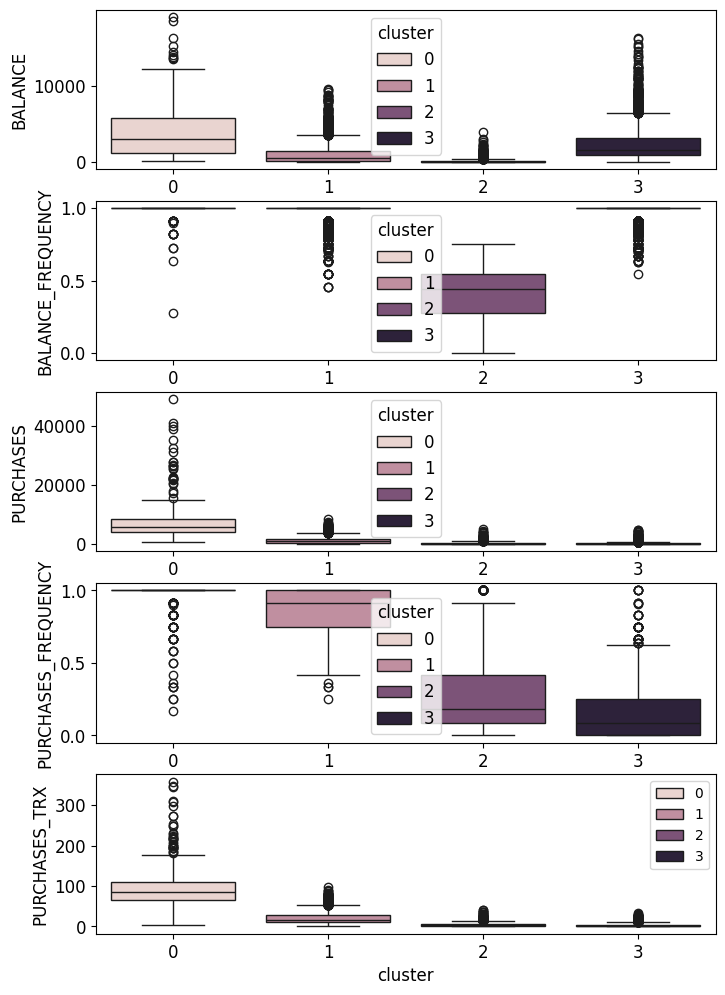

In [335]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(5,1 ,figsize = (8,12))

for ax, col in enumerate(df1.columns[:-1]) :
  sns.boxplot(x = 'cluster', y = col, hue = 'cluster',data = df1, ax = axes[ax])
plt.legend(fontsize='small')
plt.show()

In [336]:
# # 여러 군집들 중에서도 군집 0을 메인 타겟으로 한 마케팅 전략을 제안한다.
# 군집 0에 해당하는 고객들은 전체의 39%를 차지하여 규모가 클 뿐만 아니라,
# 구매계좌 잔액, 계좌 업데이트 빈도 지수를 미루어보아 구매력이 높은 집단으로 판단되기 때문이다.
#다만, 현재 해당 군집의 구매액, 구매 빈도, 거래 건수가 낮은 이유는 해당 군집들이 필요로하는
#제품의 라인업이 부족하거나 구매 과정 상의 동선, 프로모션 부족 등의 문제가 있을 것으로 예상한다.
# 이러한 문제점을 파악하여 제품 라인업을 보충하고,
# 구매 과정 상의 동선을 확인하거나 해당 군집을 대상으로 한 프로모션을 기획하기를 제안